In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Features seletcion
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# Train/test split
from sklearn.model_selection import train_test_split

# Models Supervised Learning
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

# Models Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


# Standard Scaller
from sklearn.preprocessing import StandardScaler

# Hyperparameters Tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Models evaluation
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, auc, RocCurveDisplay
from sklearn.metrics import f1_score, classification_report

from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_mutual_info_score, completeness_score, homogeneity_score, adjusted_rand_score, fowlkes_mallows_score

# TPOT
import tpot
from tpot import TPOTClassifier

# Yellowbirck
from yellowbrick.cluster import KElbowVisualizer

#TPOT results:
from tpot.builtins import StackingEstimator
from sklearn.pipeline import make_pipeline, make_union
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier

C:\Users\radek\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


For Machine Learning Part of the project :
I will test models:
- Logistic Regresion,
- Random forest Classifier. 
- Balanced Random Frest Classifier (since my 3 classes are really not ballanced).

Then I will apply tpot to see if there is another model/pipeline to be proposed.

In [2]:
lyon_ml = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\06 - ML\lyon_ready_for_ml.csv')

In [3]:
lyon_ml.head()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,pm25,pm10,o3,no2,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week,target
0,9.8,68.37,0.33,42.0,1014.5,70.2,55.1,0.0,26.0,10.0,23.0,14.0,0,1,1,0,0,1,2,0
1,10.5,78.29,11.94,35.5,1010.2,59.2,46.5,0.0,31.0,11.0,10.0,15.0,0,1,1,0,0,1,3,0
2,10.0,86.57,15.77,25.4,1015.3,88.8,30.3,0.0,36.0,7.0,15.0,11.0,0,1,1,0,0,1,4,0
3,9.5,86.54,19.85,31.4,1007.3,88.4,33.2,0.0,23.0,10.0,20.0,15.0,0,1,1,0,0,1,5,0
4,5.3,83.87,14.64,14.3,1014.0,69.0,29.0,0.0,33.0,15.0,17.0,16.0,0,1,1,0,0,1,6,0


In [4]:
lyon_ml.shape

(2922, 20)

In [5]:
# I can drop columns with the pollutants as I want for the model to indirectly predict them
lyon_ml.drop(columns=['pm25', 'pm10', 'o3', 'no2'], inplace=True)

In [6]:
lyon_ml.shape

(2922, 16)

#### Separation of data into X and y 

In [7]:
X = lyon_ml.drop(columns='target')
y =lyon_ml['target']

In [8]:
# I will standarize the data as I am planning on using the Logistic Regression as well
sc = StandardScaler()
X_stand = sc.fit_transform(X)

In [9]:
X.head()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week
0,9.8,68.37,0.33,42.0,1014.5,70.2,55.1,0.0,0,1,1,0,0,1,2
1,10.5,78.29,11.94,35.5,1010.2,59.2,46.5,0.0,0,1,1,0,0,1,3
2,10.0,86.57,15.77,25.4,1015.3,88.8,30.3,0.0,0,1,1,0,0,1,4
3,9.5,86.54,19.85,31.4,1007.3,88.4,33.2,0.0,0,1,1,0,0,1,5
4,5.3,83.87,14.64,14.3,1014.0,69.0,29.0,0.0,0,1,1,0,0,1,6


## Features selection

### Select From Model

In [10]:
# With RFC
SFM = SelectFromModel(estimator=RandomForestClassifier())
s=SFM.fit(X, y)


#Results
n_features = s.transform(X).shape[1]
print(f'Number of features: {n_features}')
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
print(f'Features selected:\n{feature_name}') 

Number of features: 7
Features selected:
Index(['temp', 'humidity', 'precip', 'windspeed', 'pressure', 'cloudcover',
       'visibility'],
      dtype='object')


In [11]:
# With BRFC
SFM = SelectFromModel(estimator=BalancedRandomForestClassifier())
s=SFM.fit(X, y)


#Results
n_features = s.transform(X).shape[1]
print(f'Number of features: {n_features}')
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
print(f'Features selected:\n{feature_name}') 

Number of features: 6
Features selected:
Index(['temp', 'humidity', 'windspeed', 'pressure', 'cloudcover',
       'visibility'],
      dtype='object')


In [12]:
# With LR - Logistic Regression
SFM = SelectFromModel(estimator=LogisticRegression())
s=SFM.fit(X_stand, y)


#Results
n_features = s.transform(X_stand).shape[1]
print(f'Number of features: {n_features}')
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
print(f'Features selected:\n{feature_name}') 

Number of features: 3
Features selected:
Index(['humidity', 'visibility', 'uvindex'], dtype='object')


RFE - Recursive Feature Elimination

In [13]:
rfe_selector = RFE(estimator=RandomForestClassifier())
m=rfe_selector.fit(X, y)
X.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Num Features: 7
Selected Features: [ True  True  True  True  True  True  True False False False False False
 False False False]
Feature Ranking: [1 1 1 1 1 1 1 3 7 6 5 9 8 2 4]


RFECV

In [14]:
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=2,
    step=1,
    n_jobs=-1,
    verbose=1,
    scoring="r2",
    cv=5,
)

m= rfecv.fit(X, y)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.


C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


In [14]:
features_selected = X.columns[rfecv.support_]
features_selected

Index(['temp', 'humidity', 'precip', 'windspeed', 'pressure', 'cloudcover',
       'visibility', 'uvindex', 'Partially cloudy', 'Rain', 'month',
       'day_of_week'],
      dtype='object')

In [ ]:
# All of the features selectors suggest to work 7-8 columns alll of them greatly dependent on the weather. In contrast to Paris data here RFECV showed that month and day of the week have influence on the model. I will try two variants: 
# First with all of the columns.
# Second with just the columns proposed by the feature selection.

### Train test split

Data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2337, 15)
(2337,)
(585, 15)
(585,)


Standarized data

In [16]:
x_train_st, x_test_st, y_train, y_test = train_test_split(X_stand, y, test_size=0.2, random_state=5)
print(x_train_st.shape)
print(y_train.shape)
print(x_test_st.shape)
print(y_test.shape)

(2337, 15)
(2337,)
(585, 15)
(585,)


Function to evaluate models

In [17]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    print("\nBalanced accuracy_score ", balanced_accuracy_score(y_test,predictions))
    print("\nF1_score ",f1_score(y_test,predictions, average='weighted'))
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'YlGn', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

### Hyperparameter Tunning 

Logistic Regression

In [18]:
grid_search = GridSearchCV(LogisticRegression(),
                           {
                              'max_iter': np.arange(100,400,50),
                              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                              'multi_class': ['auto', 'ovr', 'multinomial']
                            },cv=3, scoring="balanced_accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_stand,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


C:\Users\radek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\radek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\radek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "C:\Users\radek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 483, in _check_multi_class
  

{'max_iter': 250, 'multi_class': 'auto', 'solver': 'sag'}
0.7191204387560696


C:\Users\radek\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Random Forest Classifier

In [19]:
rand_search = RandomizedSearchCV(RandomForestClassifier(),
                           {'bootstrap': [True, False],
                            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                            'max_features': ['auto', 'sqrt'],
                            'min_samples_leaf': [1, 2, 4],
                            'min_samples_split': [2, 5, 10],
                            'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
                            cv=5, scoring="balanced_accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X,y)
print(rand_search.best_params_)
print(rand_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
0.7262145049122744


Balanced random Forest Classifier

In [20]:
rand_search = RandomizedSearchCV(BalancedRandomForestClassifier(),
                           {'bootstrap': [True, False],
                            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                            'max_features': ['auto', 'sqrt'],
                            'min_samples_leaf': [1, 2, 4],
                            'min_samples_split': [2, 5, 10],
                            'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
                            cv=5, scoring="balanced_accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X,y)
print(rand_search.best_params_)
print(rand_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}
0.7989066064549531


## Models

### Logistic Regression

The accuracy of the Logistic Regression is: 79.14529914529915 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       365
           1       0.75      0.58      0.66       199
           2       0.71      0.57      0.63        21

    accuracy                           0.79       585
   macro avg       0.76      0.69      0.72       585
weighted avg       0.79      0.79      0.78       585


Balanced accuracy_score  0.6907171211569917

F1_score  0.7829279598770207


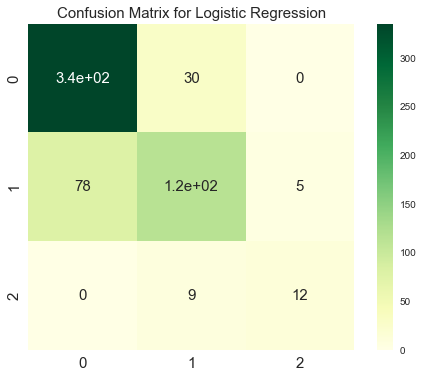

In [18]:
lr = LogisticRegression()
lr.fit(x_train_st, y_train)


# Results
y_pred = lr.predict(x_test_st)
# Predict probabilities
probs_y=lr.predict_proba(x_test_st)
### Print results 
probs_y = np.round(probs_y, 2)

print('The accuracy of the Logistic Regression is:', lr.score(x_test_st, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

Results from hyperparameters tunning:

{'max_iter': 250, 'multi_class': 'auto', 'solver': 'sag'}

The accuracy of the Logistic Regression is: 79.14529914529915 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       365
           1       0.75      0.58      0.66       199
           2       0.71      0.57      0.63        21

    accuracy                           0.79       585
   macro avg       0.76      0.69      0.72       585
weighted avg       0.79      0.79      0.78       585


Balanced accuracy_score  0.6907171211569917

F1_score  0.7829279598770207


C:\Users\radek\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


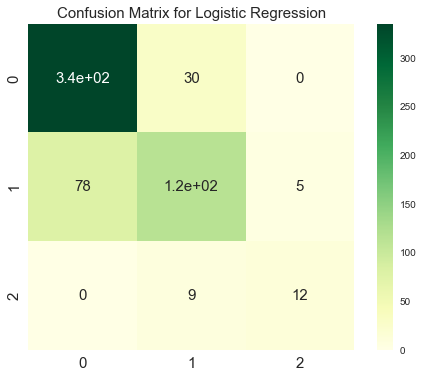

In [19]:
lr = LogisticRegression(max_iter=250, multi_class='auto', solver='sag')
lr.fit(x_train_st, y_train)


# Results
y_pred = lr.predict(x_test_st)
# Predict probabilities
probs_y=lr.predict_proba(x_test_st)
### Print results 
probs_y = np.round(probs_y, 2)

print('The accuracy of the Logistic Regression is:', lr.score(x_test_st, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

### Random Forest Classifier

The accuracy of the Random Forest Classifier is: 81.7094017094017 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       365
           1       0.79      0.62      0.70       199
           2       0.73      0.52      0.61        21

    accuracy                           0.82       585
   macro avg       0.79      0.70      0.73       585
weighted avg       0.81      0.82      0.81       585


Balanced accuracy_score  0.6955503763654104

F1_score  0.8090221459246393


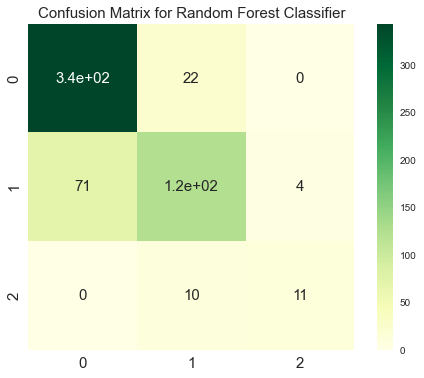

In [20]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

Results from hyperparameters tunning:
'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False

The accuracy of the Random Forest Classifier is: 81.7094017094017 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       365
           1       0.78      0.65      0.71       199
           2       0.73      0.52      0.61        21

    accuracy                           0.82       585
   macro avg       0.78      0.70      0.73       585
weighted avg       0.81      0.82      0.81       585


Balanced accuracy_score  0.6993593756999829

F1_score  0.8108625718106096


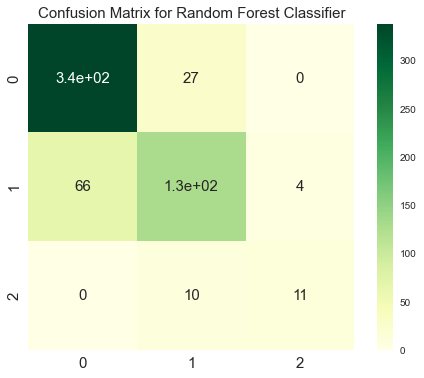

In [21]:
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=False )
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

### Balanced random Forest Classifier

The accuracy of the Random Forest Classifier is: 74.7008547008547 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       365
           1       0.68      0.50      0.58       199
           2       0.30      0.90      0.45        21

    accuracy                           0.75       585
   macro avg       0.61      0.76      0.63       585
weighted avg       0.77      0.75      0.75       585


Balanced accuracy_score  0.7595024480961013

F1_score  0.7489601214825646


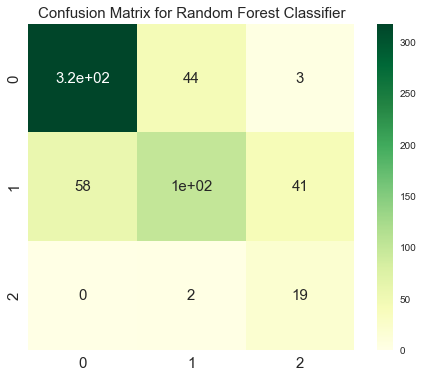

In [22]:
brfc = BalancedRandomForestClassifier()
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)
acc_brfc = brfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_brfc * 100, '%')
generate_results(brfc, y_pred, 'Random Forest Classifier')

Results from hyperparameters tunning
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}

The accuracy of the Balanced Random Forest Classifier is: 76.92307692307693 %

The classification report for Balanced Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       365
           1       0.71      0.55      0.62       199
           2       0.36      0.95      0.53        21

    accuracy                           0.77       585
   macro avg       0.64      0.79      0.67       585
weighted avg       0.79      0.77      0.77       585


Balanced accuracy_score  0.7931905668809366

F1_score  0.7694112394832354


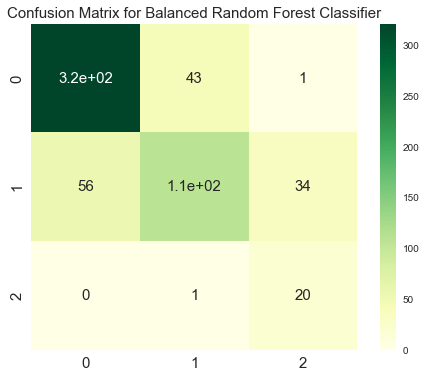

In [25]:
brfc = BalancedRandomForestClassifier(n_estimators=600,min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20, bootstrap=False)
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)
acc_brfc = brfc.score(x_test, y_test)
print('The accuracy of the Balanced Random Forest Classifier is:', acc_brfc * 100, '%')
generate_results(brfc, y_pred, 'Balanced Random Forest Classifier')

### TPOT

In [28]:
model = TPOTClassifier(generations=5, population_size=50, cv=5, scoring='balanced_accuracy', verbosity=3, n_jobs=-1)

In [29]:
model.fit(x_train, y_train)

32 operators have been imported by TPOT.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random

TPOTClassifier(generations=5, n_jobs=-1, population_size=50,
               scoring='balanced_accuracy', verbosity=3)

In [30]:
model.export(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\06 - ML\tpot_model_Lyon.py')

In [26]:
features = lyon_ml.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, y, random_state=None)

# Average CV score on the training set was: 0.7886737796279316
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.35000000000000003, min_samples_leaf=5, min_samples_split=11, n_estimators=100)),
    XGBClassifier(learning_rate=0.01, max_depth=8, min_child_weight=9, n_estimators=100, n_jobs=1, subsample=0.2, verbosity=0)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  war

In [27]:

acc_tpot = exported_pipeline.score(testing_features, testing_target)
print('The accuracy of the Stacking Estimator is:', acc_tpot * 100, '%')
# generate_results(exported_pipeline, results, 'Stacking Estimator')

The accuracy of the Stacking Estimator is: 83.44733242134062 %


C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [28]:
print(confusion_matrix(testing_target,results))
print(balanced_accuracy_score(testing_target,results))
print(f1_score(testing_target,results, average='weighted'))


[[422  52   1]
 [ 46 170   7]
 [  0  15  18]]
0.7320691455503822
0.8346022378252304


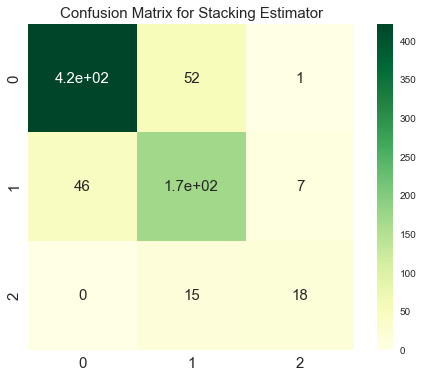

In [29]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(testing_target,results), annot = True, cmap = 'YlGn', annot_kws = {'size': 15}, square = True)
plt.title('Confusion Matrix for Stacking Estimator', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show() 

In [35]:
print(classification_report(testing_target,results))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       469
           1       0.68      0.69      0.68       229
           2       0.66      0.58      0.61        33

    accuracy                           0.80       731
   macro avg       0.73      0.71      0.72       731
weighted avg       0.80      0.80      0.80       731



### New features selection only for Balanced Forest Classifier and TPOT proposed pipeline

In [36]:
# New features (proposed by RFECV)
X_new = X[features_selected]


In [37]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2337, 12)
(2337,)
(585, 12)
(585,)


Balanced Random Forest Classifier

The accuracy of the Random Forest Classifier is: 74.01709401709402 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       365
           1       0.65      0.53      0.59       199
           2       0.32      0.95      0.48        21

    accuracy                           0.74       585
   macro avg       0.61      0.78      0.64       585
weighted avg       0.76      0.74      0.74       585



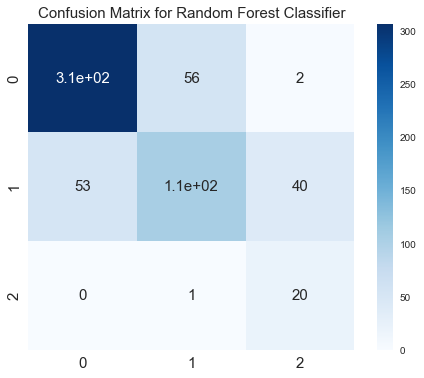

In [38]:
brfc = BalancedRandomForestClassifier()
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)
acc_brfc = brfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_brfc * 100, '%')
generate_results(brfc, y_pred, 'Random Forest Classifier')

Pipline Proposed by TPOT

In [40]:
features = X_new
training_features, testing_features, training_target, testing_target = \
            train_test_split(features,y, random_state=None)

# Average CV score on the training set was: 0.7886737796279316
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.35000000000000003, min_samples_leaf=5, min_samples_split=11, n_estimators=100)),
    XGBClassifier(learning_rate=0.01, max_depth=8, min_child_weight=9, n_estimators=100, n_jobs=1, subsample=0.2, verbosity=0)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  war

In [41]:
print(accuracy_score(testing_target,results))
print(confusion_matrix(testing_target,results))
print(balanced_accuracy_score(testing_target,results))
print(f1_score(testing_target,results, average='weighted'))

0.7948016415868673
[[413  62   5]
 [ 70 158   7]
 [  0   6  10]]
0.7192523640661938
0.7951012954428041


In [42]:
print(classification_report(testing_target,results))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       480
           1       0.70      0.67      0.69       235
           2       0.45      0.62      0.53        16

    accuracy                           0.79       731
   macro avg       0.67      0.72      0.69       731
weighted avg       0.80      0.79      0.80       731



### Isolation Forest Model


The classification report for Isolation Forest Classifier is:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       365
           1       0.32      0.56      0.41       199
           2       0.00      0.00      0.00        21

    accuracy                           0.19       585
   macro avg       0.08      0.14      0.10       585
weighted avg       0.11      0.19      0.14       585



C:\Users\radek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radek\anaconda3\lib\site-packages\sklearn\metrics\_cla

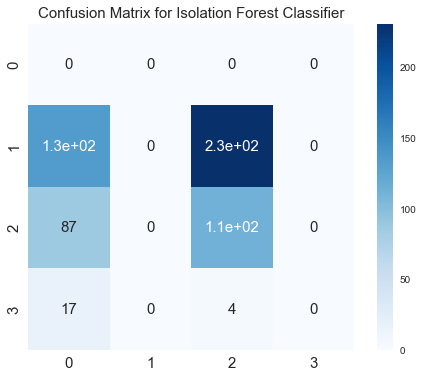

In [43]:
iso_for =  IsolationForest()
iso_for.fit(x_train, y_train)
y_pred = iso_for.predict(x_test)
# acc_iso_for = iso_for.score(x_test, y_test)
# print('The accuracy of the Isolation Forest Classifier is:', acc_iso_for * 100, '%')
generate_results(iso_for, y_pred, 'Isolation Forest Classifier')

## Unsupervised Learning

In [44]:
def unsupervised_metrics(X, y_true, y_pred):
	print("Silhouette Coefficient is equal to:", (silhouette_score(X,y_pred)))
	print("Variance Ratio Crterion is equal to:", (calinski_harabasz_score(X, y_pred)))
	print("Adjusted mutual Information is equal to:", (adjusted_mutual_info_score(y_true,y_pred)))
	print("Completeness is equal to:", (completeness_score(y_true,y_pred)))
	print("Homogeneity is equal to:", (homogeneity_score(y_true,y_pred)))
	print("Adjusted Rand Index is equal to:", (adjusted_rand_score(y_true,y_pred)))
	print("Fowlkes Mallow Scorex is equal to:",(fowlkes_mallows_score(y_true,y_pred)))

Data

In [45]:
data_uml = lyon_ml.drop(columns='target')

In [46]:
data_uml.head()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week
0,9.8,68.37,0.33,42.0,1014.5,70.2,55.1,0.0,0,1,1,0,0,1,2
1,10.5,78.29,11.94,35.5,1010.2,59.2,46.5,0.0,0,1,1,0,0,1,3
2,10.0,86.57,15.77,25.4,1015.3,88.8,30.3,0.0,0,1,1,0,0,1,4
3,9.5,86.54,19.85,31.4,1007.3,88.4,33.2,0.0,0,1,1,0,0,1,5
4,5.3,83.87,14.64,14.3,1014.0,69.0,29.0,0.0,0,1,1,0,0,1,6


### Elbow method

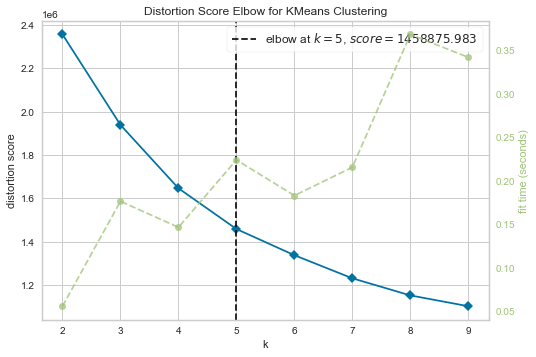

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(data_uml)
visualizer.poof()

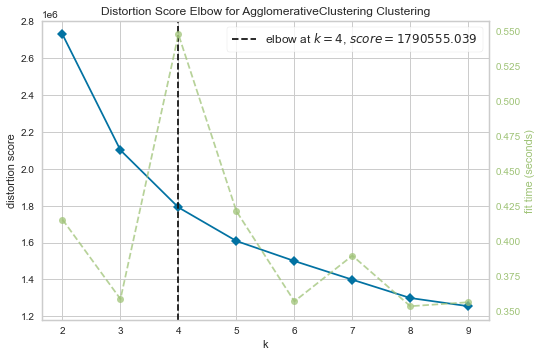

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(data_uml)
visualizer.poof()

### Models

#### KMeans

In [53]:
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(data_uml)
y_kmeans = kmeans.predict(data_uml)
y_kmeans 


array([2, 2, 1, ..., 1, 1, 2])

In [54]:
unsupervised_metrics(X=data_uml, y_true=lyon_ml.target, y_pred=y_kmeans)

Silhouette Coefficient is equal to: 0.2859774537361678
Variance Ratio Crterion is equal to: 2235.25908094797
Adjusted mutual Information is equal to: 0.0012713010519434318
Completeness is equal to: 0.0017102315549512785
Homogeneity is equal to: 0.0024261374314920666
Adjusted Rand Index is equal to: 4.713866467309856e-05
Fowlkes Mallow Scorex is equal to: 0.41412601902402274


In [56]:
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(data_uml)
y_kmeans = kmeans.predict(data_uml)
y_kmeans
unsupervised_metrics(X=data_uml, y_true=lyon_ml.target, y_pred=y_kmeans)


Silhouette Coefficient is equal to: 0.25559367316796594
Variance Ratio Crterion is equal to: 1724.825648230465
Adjusted mutual Information is equal to: 0.13895587565069575
Completeness is equal to: 0.10419757717452653
Homogeneity is equal to: 0.21312143507834053
Adjusted Rand Index is equal to: 0.09948944714737971
Fowlkes Mallow Scorex is equal to: 0.40556586297641234


In [ ]:
# sns.set_style('darkgrid')
# sns.scatterplot(data=data_uml, x='temp', y='Lat', hue='labels_kmeans', palette='RdYlBu')
# plt.show()

In [112]:
y_kmeans.value_counts()

2    1158
0     883
1     881
dtype: int64

#### Agglomerative Clustering

In [60]:
cluster_ag = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_ag = cluster_ag.fit_predict(data_uml)

In [61]:
unsupervised_metrics(X=data_uml, y_true=lyon_ml.target, y_pred=y_ag)

Silhouette Coefficient is equal to: 0.24745327072563852
Variance Ratio Crterion is equal to: 1694.4655832047258
Adjusted mutual Information is equal to: 0.09322710551486102
Completeness is equal to: 0.07463322816294815
Homogeneity is equal to: 0.1273898494890331
Adjusted Rand Index is equal to: 0.06113291555635676
Fowlkes Mallow Scorex is equal to: 0.42096742043887597


DBSCAN

In [80]:
dbscan = DBSCAN(eps=35, min_samples=10)
dbscan.fit(data_uml)
y_dbscan = dbscan.fit_predict(data_uml)
set(y_dbscan)


{-1, 0}

In [81]:
unsupervised_metrics(X=data_uml, y_true=lyon_ml.target, y_pred=y_dbscan)

Silhouette Coefficient is equal to: 0.37045568261593975
Variance Ratio Crterion is equal to: 3.463712797415837
Adjusted mutual Information is equal to: -0.0002761780717230538
Completeness is equal to: 0.051213419654566585
Homogeneity is equal to: 0.00020383922466844372
Adjusted Rand Index is equal to: -0.0003357046085412414
Fowlkes Mallow Scorex is equal to: 0.7148243193067242
